In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

In [9]:
import pandas 

# collect all our data sets 

tm = pandas.read_csv( '../data_sets/experimental_data/thermo_paper_data_set.csv', index_col=0 )[ [ 'expression' ] ]

bench = pandas.read_csv( '../data_sets/features/benchmark_feature_set.csv' )
bench = bench.groupby( 'description' ).apply( lambda x: x.sort_values( 'total_score' ).head( 10 ).mean() ) 

foldx = pandas.read_csv( '../data_sets/features/foldx.csv', index_col=0 )

ddg = pandas.read_csv( '../data_sets/features/ddg_feature_set.csv', index_col=0 )

relax = pandas.read_csv( '../data_sets/features/fast_relax.csv' )
relax = relax.groupby( 'name' ).apply( lambda x: x.sort_values( 'total_score' ).head( 10 ).mean() ) 

In [10]:
feature_sets = [ 
    ( 'RosettaDesign', bench ),
    #( 'FoldX', foldx ), 
    #( 'Rosetta ddG', ddg ), 
    #( 'Rosetta FastRelax', relax ), 
]

RosettaDesign


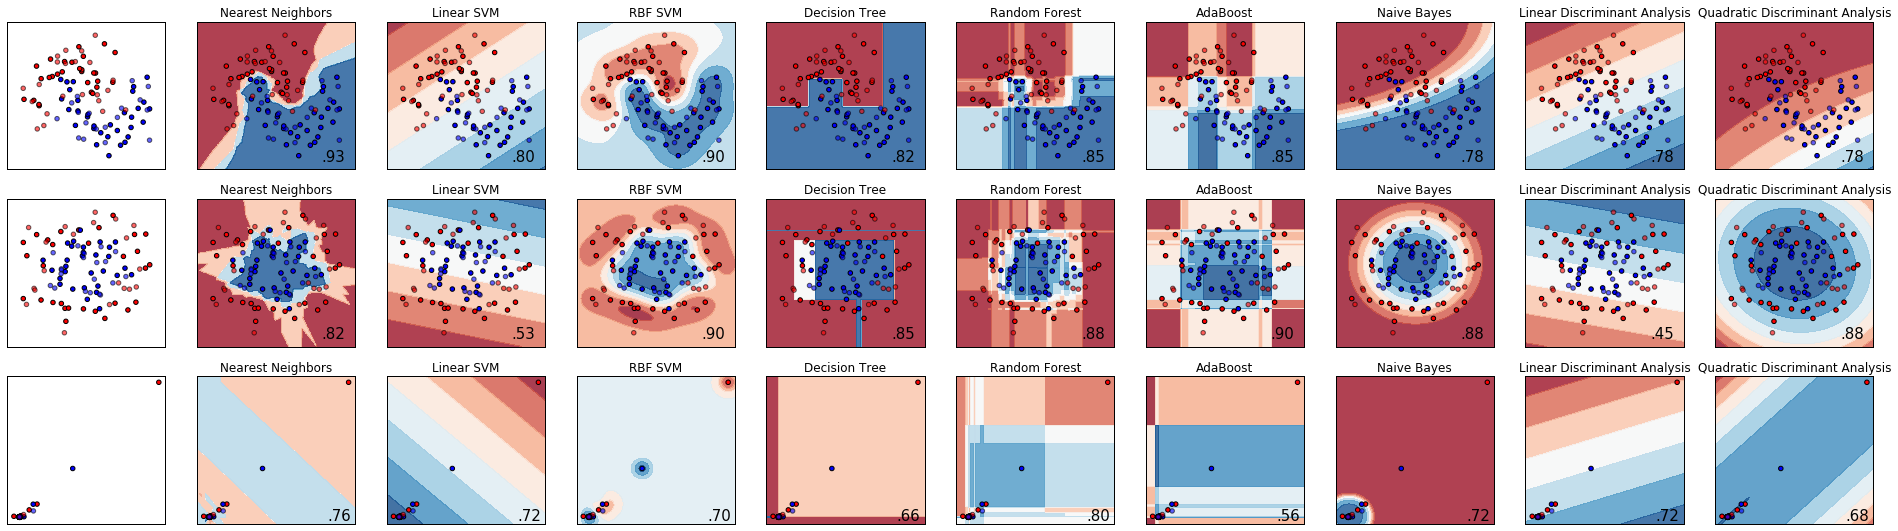

In [11]:
# evaluate classifiers for each feature set  

from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import KFold, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import numpy as np 

for name, feature_set in feature_sets:
    feature_set = tm.join( feature_set ).dropna()
    scl = StandardScaler()
    #X = scl.fit_transform( feature_set.ix[ : , 1: ] )
    X = feature_set[ [ 'total_score', 'fa_rep' ] ] 
    y = feature_set.ix[ : , 0 ]
    
    print name 
    
    
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.colors import ListedColormap
    from sklearn.cross_validation import train_test_split
    from sklearn.preprocessing import StandardScaler
    from sklearn.datasets import make_moons, make_circles, make_classification
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.svm import SVC
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
    from sklearn.naive_bayes import GaussianNB
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

    h = .02  # step size in the mesh

    names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
             "Random Forest", "AdaBoost", "Naive Bayes", "Linear Discriminant Analysis",
             "Quadratic Discriminant Analysis"]
    classifiers = [
        KNeighborsClassifier(3),
        SVC(kernel="linear", C=0.025),
        SVC(gamma=2, C=1),
        DecisionTreeClassifier(max_depth=5),
        RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
        AdaBoostClassifier(),
        GaussianNB(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis()]

    my_data = (X, y)

    datasets = [
        make_moons(noise=0.3, random_state=0),
        make_circles(noise=0.2, factor=0.5, random_state=1),
        my_data
    ]

    figure = plt.figure(figsize=(27, 9))
    i = 1

    for ds in datasets:

        X, y = ds
        X = StandardScaler().fit_transform(X)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))

        # just plot the dataset first
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)

            # Plot the decision boundary. For that, we will assign a color to each
            # point in the mesh [x_min, m_max]x[y_min, y_max].
            if hasattr(clf, "decision_function"):
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

            # Plot also the training points
            ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       alpha=0.6)

            ax.set_xlim(xx.min(), xx.max())
            ax.set_ylim(yy.min(), yy.max())
            ax.set_xticks(())
            ax.set_yticks(())
            ax.set_title(name)
            ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                    size=15, horizontalalignment='right')
            i += 1

    figure.subplots_adjust(left=.02, right=.98)
    plt.show()
